In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalizationV2
from tensorflow.keras.optimizers import Adam

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
8
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


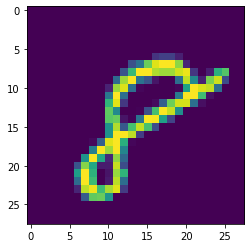

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
print(x_train.shape)
plt.imshow(x_train[59999])

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

#y_train= to_categorical(y_train)
#y_test= to_categorical(y_test)

print(y_train[59999])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train= x_train/255.0
x_test= x_test/255.0

In [ ]:
model= Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3), activation= 'relu'))
model.add(Conv2D(8, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [ ]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model_fit= model.fit(x_train, y_train,
          batch_size= 32,
          epochs= 10,
          verbose= 1)

Epoch 1/10
1875/1875 [==============================] - 56s 3ms/step - loss: 0.4578 - accuracy: 0.8515
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0718 - accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [ ]:
model.save('digit_classified.h5')

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

"""
y_pred= model.predict(x_test) # This contains 100,000 elements, since one picture will have 10 outputs (0 or 1) for 10 classes (0 to 9).
print(y_pred) # Prints decimal values of the output in y_pred.
y_pred = np.argmax(y_pred, axis= 1) # This will return the index of the element having maximum value in one row (axis= 1). This is done to know the number that has the maximum probability, since the numbers represent the indices only (0 to 9).
acc= accuracy_score(y_pred, y_test)
print(f'Test accuracy: {acc}')
"""

eval= model.evaluate(x_test, y_test, verbose= 0)
print(f'Test acuuracy: {eval[1]}')

Test acuuracy: 0.9890000224113464
